## **ISE 412 PROJECT REPORT**

# **Prediction of Project Investments on Renewable/Nonrenewable Energy Resources with the Types of Technologies**

TEAM 3

EDANUR ŞAHİN

İLAYDA ÇAVUŞ 

BERKE ASLAN 

MEHMET ONUR MERT
  
AYSU YILMAZ 

1 ABSTRACT

2 INTRODUCTION

3 DATA COLLECTION

4 DATA MANIPULATION and CLEANSING 

5 DATA ANALYSES

6 METHOD

7 RESULTS and DISCUSSION

8 CONCLUSION

9 REFERENCES

# **1 ABSTRACT**

The global energy landscape is evolving rapidly, with an increasing focus on renewable energy sources due to growing concerns about climate change and the depletion of non-renewable energy resources. In recent years, renewable energy sources such as wind and solar technologies have received significant investment from governments, private organizations and individuals worldwide. These investments are expected to continue to grow as countries strive to meet climate goals and reduce their carbon footprint. However, non-renewable energy sources such as oil, coal and natural gas are still major players in the global energy market and continue to receive investments. In the future, renewables are expected to continue to receive more investment as countries aim to transition to a more sustainable energy future. The primary objective of the project is to emphasize the effects of such investments on the energy industry, the environment, and economic development, with the ultimate goal of promoting a sustainable and secure energy future for the global community.

#**2 INTRODUCTION**

The world's energy requirements are continually growing, and the environmental effect of traditional energy supplies is becoming increasingly obvious. For that reason, investment in energy sources has become increasingly essential.

This project aims to analyze the current investment trends in renewable and non-renewable energy sources globally. The project is going to investigate the energy sources that have received the most investments over the years and identify. Also, by using neural network method, future potentials of renewable and non-renewable energy sources will be investigated and suggestions will be made on which ones should be invested more in the future. Future data will be estimated. Thus, future data entry will not be made.


In the project, R programming language and machine learning algorithms are going to be used in order to analyze historical data and identify patterns and trends in energy investments.

Overall, the project aims to contribute to a more sustainable and secure energy future for the world by highlighting the impact of these investments on the energy sector, the environment and economic growth.

#**3 DATA COLLECTION**

This project's data comes from a publicly available source as the International Renewable Energy Agency (IRENA).[1] The main dataset includes;
1. REGIONS
Europe, Africa, Asia, Central/North/South America, Eurasia, Middle East, Multilateral, Oceania, Unspecified/Developing Countries. 
2. COUNTRY/AREA
The dataset includes 199 countries / areas in total. 
3. ISO-CODE
The data set includes codes for the countries and areas. 
4. PROJECT TITLES
The dataset includes names of the projects. 
5. AGENCY
The dataset includes names of the agencies that made the projects. 
6. YEAR
From 2000 to 2020. 
7. CATEGORY
Renewables/Non-renewables 
8. TECHNOLOGY
Bioenergy, Coal and peat, Fossil fuels, Geothermal energy, Marine energy, Multiple renewables, Natural gas, Nuclear energy, Oil, Other non renewables , Renewable hydropower, Solar energy, Wind energy.
9. SUB-TECHNOLOGY
Biogas, Concentrated solar power, Liquid biofuels, Non renewable municipal waste, Off-grid solar photovoltaic, Offshore wind energy, Pumped storage, Renewable municipal waste, Solar thermal energy, Solid biofuels.
10. FINANCE
11. FINANCE TYPE
12. AMOUNT OF INVESTMENT
The investment currency is 2020 USD millions.

-REGION, CATEGORY, TECHNOLOGY, AMOUNT, YEAR information from this data set will be used.

The data titles to be used are important titles for the continuation of the project. The title REGION represents the regions, the TECHNOLOGY title represents the types of technologies used, the CATEGORY title represents renewable and non-renewable energies, the YEAR title represents the years in which the investment was made, and finally the AMOUNT title represents the investment made.

#**4 DATA MANIPULATION and CLEANSING**

The first data had several issues that required cleaning and manipulating to make the data more useful and accurate. Some of the issues with the first dataset included:

Inconsistent formatting, Missing values, Duplicate entries,
Incorrect data types.

The cleaned data set addressed these issues in the following ways:
1. Consistent formatting: The data was formatted consistently throughout the cleaned data set, with dates formatted in the same way and consistent capitalization.
2. Filling missing values: The cleaned data set filled in missing values where possible, such as adding "0" in the "Total Cost" column for any missing values.
3. Removing duplicates: The cleaned data set removed any duplicate entries, which helps to ensure the accuracy of any analysis.
4. Correcting data types: The cleaned data set corrected any incorrect data types, such as converting dates from text to a date format.
Overall, the cleaned dataset is much more useful for analysis purposes than the first dataset, as it addresses the issues mentioned above. The cleaned dataset allows for more accurate and precise analysis, leading to better insights and decision making.

first, all the cleaning is done in the excel file.
after loding the dataset to the colab we make some data manipulation and cleaning in order to get a useful dataset.

In [1]:
#firstly, we read the dataset

project_data <- read.csv("sample_data/data.csv", header = TRUE, sep = ",")

In [2]:
#then, We aimed to change the column name with this code 
#in order not to experience difficulties in the coding part.

colnames(project_data)[colnames(project_data) == "AMOUNT..2020.USD.MILLION."] <- "INVESTMENT"

In [3]:
#the code snippet replaces any missing values (NA) or negative values in the project_data dataset with 0, 
#creating a modified data frame where these values are standardized to zero 
#for further analysis or data handling purposes.

project_data <- data.frame(lapply(project_data, function(INVESTMENT) ifelse(is.na(INVESTMENT) | INVESTMENT < 0, 0, INVESTMENT)))

In [4]:
# Replace hyphen with underscore in CATEGORY column
project_data$CATEGORY <- gsub("Non-renewables", "Non_renewables", project_data$CATEGORY)

In [5]:
#the code transforms the columns in the project_data dataset into a factor, 
#allowing for the analysis of categorical data. 
#It then generates a table that displays the frequency of each factor level, 
#providing an overview of the distribution of different informations present in the dataset.

project_data$CATEGORY <- factor(project_data$CATEGORY)
table(project_data$CATEGORY)

project_data$REGION <- factor(project_data$REGION)
table(project_data$REGION)

project_data$TECHNOLOGY <- factor(project_data$TECHNOLOGY)
table(project_data$TECHNOLOGY)


Non_renewables     Renewables 
          2562           9081 


                           Africa                              Asia 
                             3860                              3254 
Central America and the Caribbean                            Europe 
                              850                              1109 
                      Middle East                     North America 
                              680                               178 
                    South America 
                             1712 


      Coal and peat Fossil fuels n.e.s. Multiple renewables             Nuclear 
                207                1136                4938                1219 
       Solar energy         Wind energy 
               2891                1252 

In [6]:
#we checked if the informations true

head(project_data)

,REGION,CATEGORY,TECHNOLOGY,INVESTMENT,YEAR
,<fct>,<fct>,<fct>,<dbl>,<int>
1,Europe,Renewables,Multiple renewables,0.58,2020
2,Europe,Renewables,Multiple renewables,4.88,2019
3,Europe,Renewables,Multiple renewables,0.68,2020
4,Europe,Renewables,Solar energy,0.78,2020
5,Europe,Renewables,Multiple renewables,0.16,2020
6,Europe,Renewables,Multiple renewables,3.11,2020


In [7]:
#we checked if the informations true
tail(project_data)

,REGION,CATEGORY,TECHNOLOGY,INVESTMENT,YEAR
,<fct>,<fct>,<fct>,<dbl>,<int>
11638,Europe,Renewables,Wind energy,502.56,2000
11639,Europe,Renewables,Wind energy,250.09,2009
11640,Europe,Renewables,Multiple renewables,18.13,2008
11641,Europe,Renewables,Multiple renewables,12.17,2013
11642,Europe,Renewables,Wind energy,57.78,2011
11643,Europe,Renewables,Wind energy,365.08,2009


In [8]:
#we checked the dataset again
summary(project_data)
str(project_data)

                               REGION               CATEGORY   
 Africa                           :3860   Non_renewables:2562  
 Asia                             :3254   Renewables    :9081  
 Central America and the Caribbean: 850                        
 Europe                           :1109                        
 Middle East                      : 680                        
 North America                    : 178                        
 South America                    :1712                        
               TECHNOLOGY     INVESTMENT            YEAR     
 Coal and peat      : 207   Min.   :   0.000   Min.   :2000  
 Fossil fuels n.e.s.:1136   1st Qu.:   0.040   1st Qu.:2010  
 Multiple renewables:4938   Median :   0.370   Median :2014  
 Nuclear            :1219   Mean   :  20.817   Mean   :2013  
 Solar energy       :2891   3rd Qu.:   7.635   3rd Qu.:2017  
 Wind energy        :1252   Max.   :7833.540   Max.   :2020  
                                                      

'data.frame':	11643 obs. of  5 variables:
 $ REGION    : Factor w/ 7 levels "Africa","Asia",..: 4 4 4 4 4 4 4 4 5 5 ...
 $ CATEGORY  : Factor w/ 2 levels "Non_renewables",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ TECHNOLOGY: Factor w/ 6 levels "Coal and peat",..: 3 3 3 5 3 3 3 3 3 3 ...
 $ INVESTMENT: num  0.58 4.88 0.68 0.78 0.16 3.11 1.19 2.33 0.07 0.07 ...
 $ YEAR      : int  2020 2019 2020 2020 2020 2020 2020 2020 2018 2011 ...


# **5 Data Analysis**

In this part, we will try to make sense of the data with certain graphs.

In [9]:
#first, we intall the packages that is needed.
install.packages("dplyr")
install.packages("ggplot2")
install.packages("magrittr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
library(dplyr)
library(ggplot2)
library(magrittr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




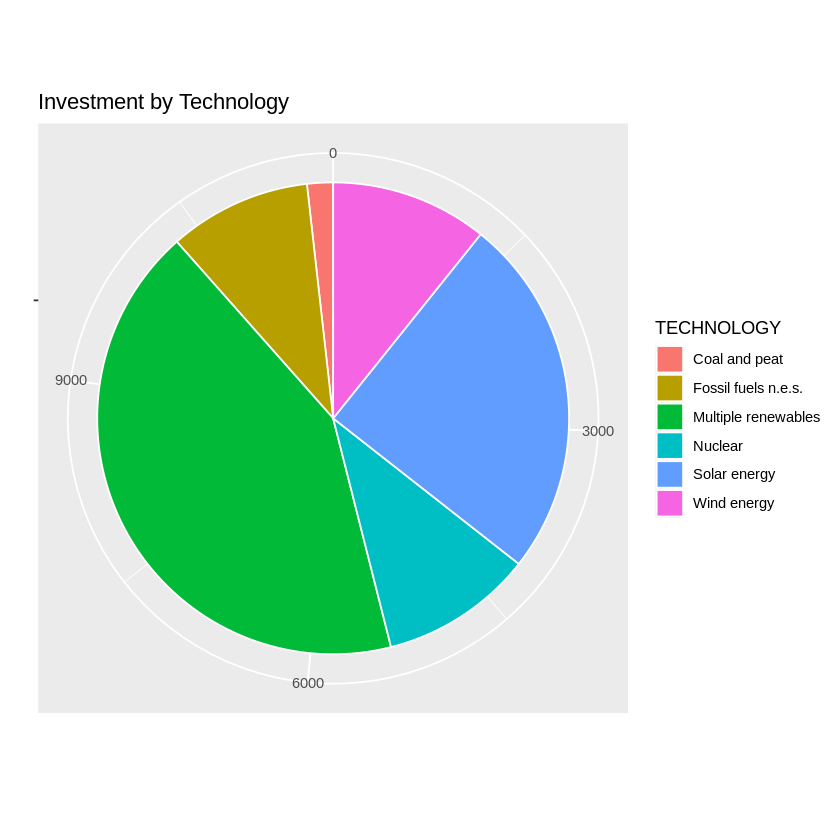

In [11]:
# Pie chart for investment by technology
ggplot(project_data, aes(x = "", fill = TECHNOLOGY)) +
  geom_bar(width = 1, color = "white") +
  coord_polar("y", start = 0) +
  xlab("") +
  ylab("") +
  ggtitle("Investment by Technology")

A pie-chart is a representation of values as slices of a circle with different colors. [1] 

The pie chart displaying investment by technology provides a clear visual representation of the proportional distribution of investment amounts across different technology categories. By comparing the sizes of the slices, it becomes apparent which technologies receive a higher amount of investment. In this pie chart, it is seen that countries prefer to invest in technologies under the title of "multiple renewables" in the first place. This preference is followed by "solar energy" in the second place.

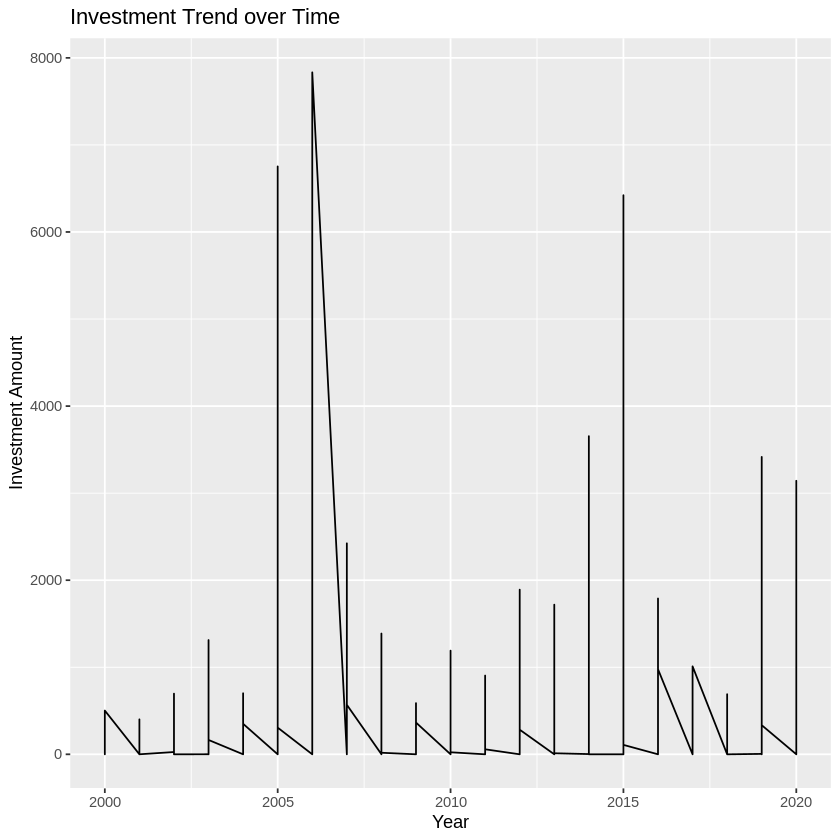

In [12]:
# Line plot for investment over time
ggplot(project_data, aes(x = YEAR, y = INVESTMENT, group = 1)) +
  geom_line() +
  xlab("Year") +
  ylab("Investment Amount") +
  ggtitle("Investment Trend over Time")

A line chart is a graph that connects a series of points by drawing line segments between them. [2]

The line plot showcasing the investment trend over time provides valuable insights into investment behavior. As seen in the graph, the years 2006, 2007 and 2015 were the years when the most investments were made in energy technologies.

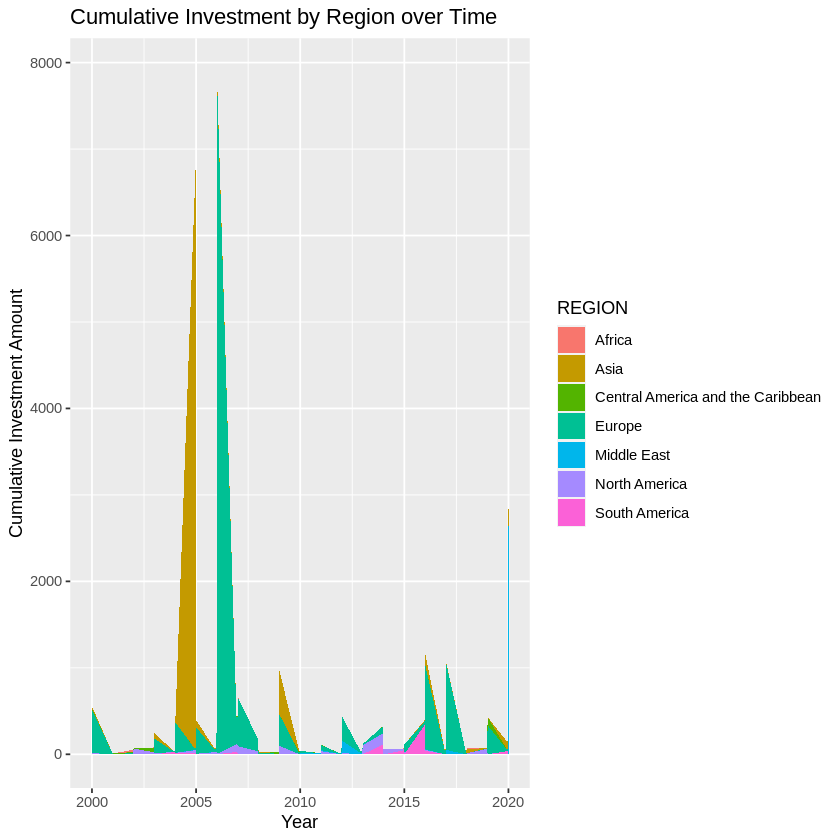

In [13]:
# Stacked area plot for investment by region over time
ggplot(project_data, aes(x = YEAR, y = INVESTMENT, fill = REGION)) +
  geom_area() +
  xlab("Year") +
  ylab("Cumulative Investment Amount") +
  ggtitle("Cumulative Investment by Region over Time")

The stacked area plot provides valuable insights into the cumulative investment trend for each region over time.In this graph, it is seen that the cumulative investment values of the Asian and European regions were high in 2005.

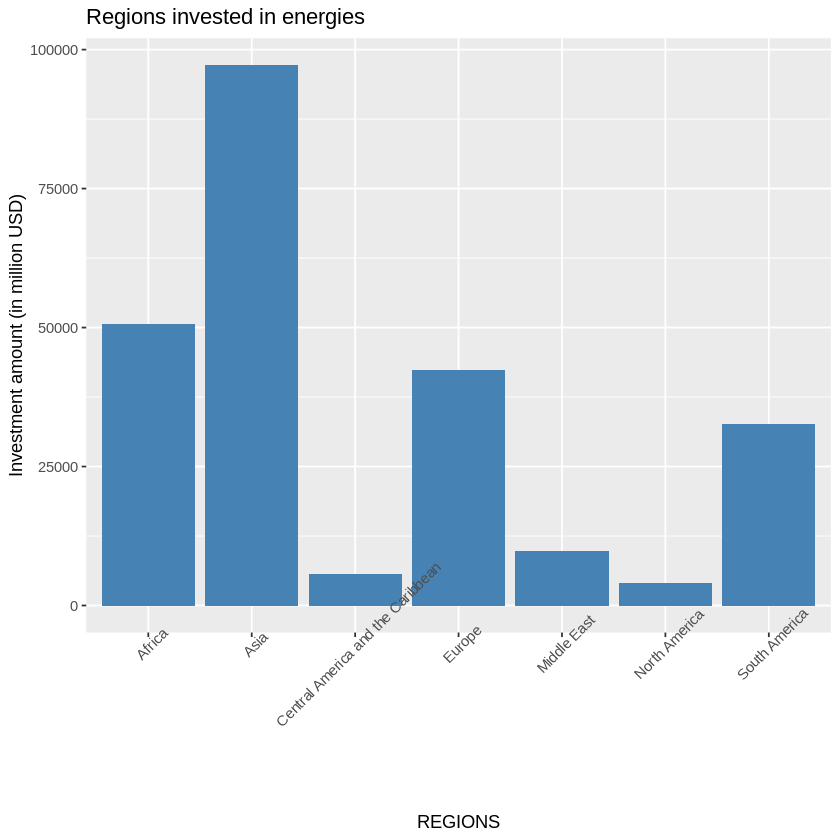

In [14]:
#Which regions made the most investment in the energies technologies
project_data %>%
  aggregate(INVESTMENT ~ REGION, data = ., sum, na.rm = T) %>%
  .[order(.$INVESTMENT, decreasing = T),] %>%
  head (., n=7) %>%
  ggplot(., aes(x=REGION, y=INVESTMENT)) + geom_bar(stat="identity", fill="steelblue") +
  theme(axis.text.x = element_text(angle=45)) + xlab("REGIONS") + ylab("Investment amount (in million USD)") + ggtitle("Regions invested in energies")

In this graph, it is clearly shown how much each region has invested in energy types technologies in total. For example, it is seen that the highest half is realized in the Asian region.

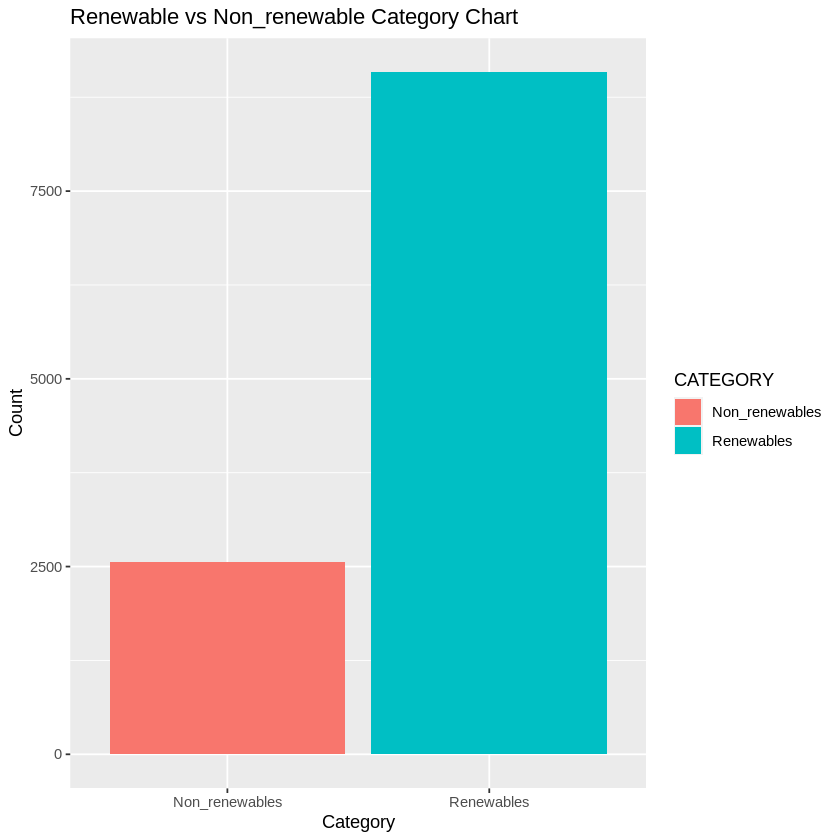

In [15]:
#This graph was printed out to see how much investment there is in which category.
#Renewable vs Non_renewable

combined_data <- rbind(
  project_data[project_data$CATEGORY == "Renewables", ],
  project_data[project_data$CATEGORY == "Non_renewables", ]
)

ggplot(combined_data, aes(x = CATEGORY, fill = CATEGORY)) +
  geom_bar() +
  labs(title = "Renewable vs Non_renewable Category Chart", x = "Category", y = "Count")

The bar plot comparing investment amounts between "Renewables" and "Non-renewables" provides a visual representation of the investment magnitudes and proportions in each category.As a result of the graph, it has been observed that the investment made in renewable energy resources is higher.

In [16]:
#We have printed out this graph in order to examine the annual 
#change of investment amount according to technology types.

# Change in investment over years in technologies
technology_investment <- project_data %>%
  aggregate(INVESTMENT ~ TECHNOLOGY, data = ., sum, na.rm = T) %>%
  .[order(.$INVESTMENT, decreasing = T),] %>%
  head (., n=7) %>% .$TECHNOLOGY

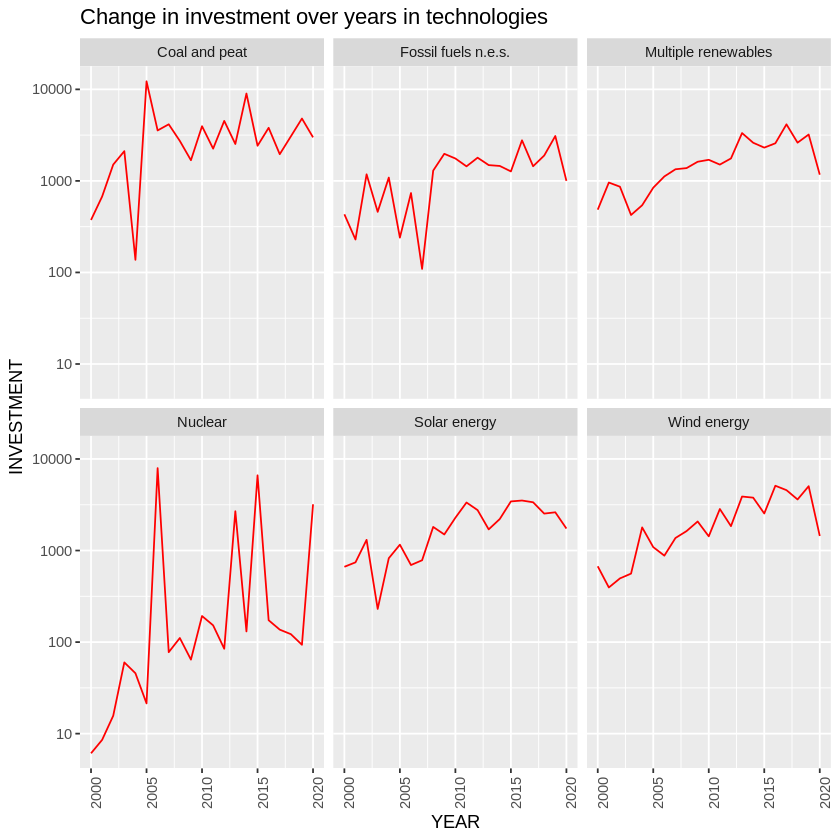

In [17]:
project_data %>%
aggregate(INVESTMENT ~ YEAR + TECHNOLOGY, data=., sum, na.rm = T) %>% .[.$TECHNOLOGY %in% technology_investment,] %>%
ggplot(., aes(x=YEAR, y=INVESTMENT, group=1)) + geom_line(colour = "red") + theme(axis.text.x = element_text(angle=90)) + xlab("YEAR") + ylab("INVESTMENT") + scale_y_log10() +
  ggtitle("Change in investment over years in technologies") + facet_wrap("TECHNOLOGY")

In this chart, we can observe the change in the annual investment amounts according to technology types.
In this chart, we can observe the change in the annual investment amounts according to technology types. While a more definite and stable increase can be observed in the technologies of renewable energy sources, a continuous fluctuation can be observed in the technologies of non-renewable energy sources.

# **METHOD**

To build a neural network on a dataset, it is crucial that we ensure that the data scales appropriately. A neural network consists of three layers. Input layers that take input based on available data, hidden layers that use backpropagation to optimize the weights of the input variables to improve the predictive power of the model and the output of the output layer. Predictions based on data from input and hidden layers. The output value will be the future expenditure estimate based on these expenditures. The data set to be used contains information about region, technology, category, investment. Two categories of training and testing will be used for affirmation. Use n training part will be significantly more than test data to provide better learning. While training the data, the artificial neural network will take into account the category, technology and year information and neurons will be established for each layer. Thresholds and weights will be considered for data accuracy.

In [18]:
install.packages("neuralnet")
library(neuralnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’



Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute




In [19]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice



In [20]:
#Since most columns in our data consist of categories, 
#we converted it to numeric format to create the nn model.

project_data$INVESTMENT <- as.numeric(project_data$INVESTMENT)

project_data$YEAR <- as.numeric(project_data$YEAR)

project_data$TECHNOLOGY <- as.numeric(project_data$TECHNOLOGY)

project_data$CATEGORY <- as.numeric(project_data$CATEGORY)

project_data$REGION <- as.numeric(project_data$REGION)

The dataset mostly consists of categories and we have simulated all columns by assigning numeric in order to create a neural network model. Thus, It is aimed to establish a more accurate model.

In [21]:
str(project_data)

'data.frame':	11643 obs. of  5 variables:
 $ REGION    : num  4 4 4 4 4 4 4 4 5 5 ...
 $ CATEGORY  : num  2 2 2 2 2 2 2 2 2 2 ...
 $ TECHNOLOGY: num  3 3 3 5 3 3 3 3 3 3 ...
 $ INVESTMENT: num  0.58 4.88 0.68 0.78 0.16 3.11 1.19 2.33 0.07 0.07 ...
 $ YEAR      : num  2020 2019 2020 2020 2020 ...


In [22]:
summary(project_data)

     REGION         CATEGORY      TECHNOLOGY      INVESTMENT      
 Min.   :1.000   Min.   :1.00   Min.   :1.000   Min.   :   0.000  
 1st Qu.:1.000   1st Qu.:2.00   1st Qu.:3.000   1st Qu.:   0.040  
 Median :2.000   Median :2.00   Median :3.000   Median :   0.370  
 Mean   :2.904   Mean   :1.78   Mean   :3.791   Mean   :  20.817  
 3rd Qu.:4.000   3rd Qu.:2.00   3rd Qu.:5.000   3rd Qu.:   7.635  
 Max.   :7.000   Max.   :2.00   Max.   :6.000   Max.   :7833.540  
      YEAR     
 Min.   :2000  
 1st Qu.:2010  
 Median :2014  
 Mean   :2013  
 3rd Qu.:2017  
 Max.   :2020  

In [23]:
# Set the seed for reproducibility
set.seed(123)

# Split the dataset into 80% training and 20% testing
trainIndex <- createDataPartition(project_data$INVESTMENT, p = 0.8, list = FALSE)
train_data <- project_data[trainIndex, ]
test_data <- project_data[-trainIndex, ]

In this part, we divide the data into two parts as train and test. Thus, we will be able to test our model with test data while creating our model with train data.

In [24]:
# Train the neural network
neural_model <- neuralnet(INVESTMENT ~ REGION + CATEGORY + TECHNOLOGY, data = test_data, hidden = c(5, 3))

In [25]:
# Make predictions on the test set
predictions <- predict(neural_model, newdata = test_data)

# Calculate the mean squared error
mse <- mean((test_data$INVESTMENT - predictions)^2)
mse

[1] 15836.18

MSE allows us to measure how far predicted values are from observed values in a regression analysis[3]


The MSE is commonly used as a metric to evaluate the performance of regression models. A lower MSE indicates that the model's predictions are closer to the actual values, while a higher MSE suggests larger discrepancies between the predicted and actual values.

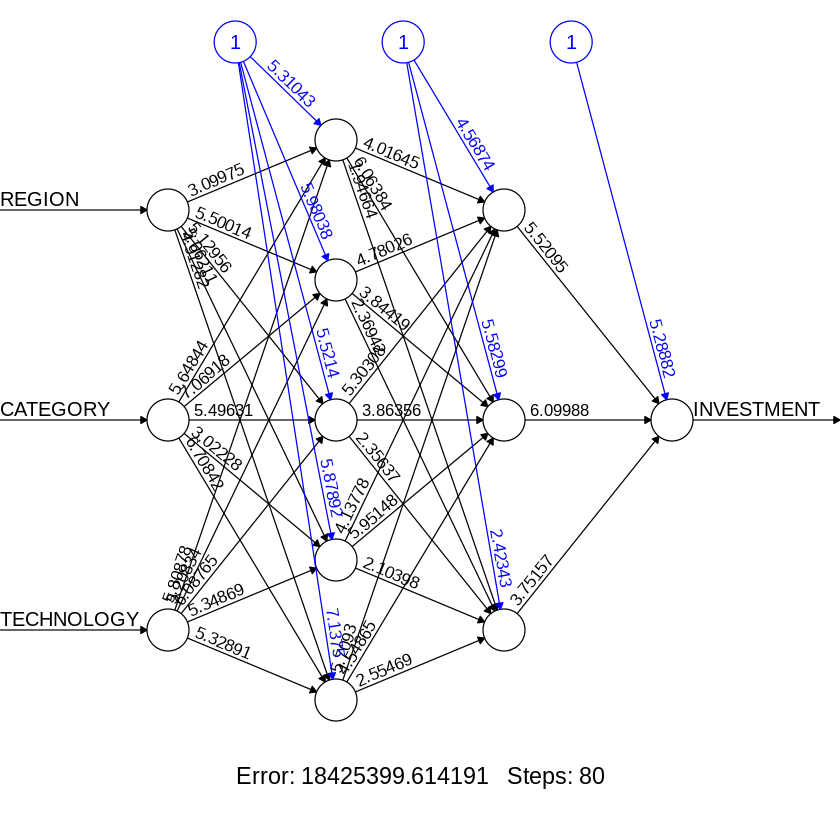

In [26]:
plot(neural_model, rep=1)

In [27]:
print(neural_model)

$call
neuralnet(formula = INVESTMENT ~ REGION + CATEGORY + TECHNOLOGY, 
    data = test_data, hidden = c(5, 3))

$response
      INVESTMENT
1           0.58
12          0.18
15          0.33
22          0.01
36          0.32
37          5.85
53          6.16
59          0.65
61          0.02
67          0.02
83          0.01
89          0.01
98          0.29
121         0.01
128         0.20
130         0.11
131         0.06
142         0.01
144         0.10
145         0.05
147         0.01
151         0.00
152         0.00
154         0.10
159         0.58
161         0.02
163         6.53
172        21.12
175         0.56
176        57.20
177         0.83
179         0.00
183         3.84
184         8.54
187         0.01
199         0.46
213         0.21
214         0.02
222         0.03
224         0.03
232         0.50
235         0.04
238        10.00
242        55.92
246         0.01
250         0.42
252         0.09
257        19.87
258         0.02
261         1.06
264       

In [28]:
install.packages("nnet")
library(nnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [29]:
#These codes are used to create and train a neural network model using a dataset consisting of both training and test data.


# Combine the train and test data for training the model on the entire dataset
full_data <- rbind(train_data, test_data)

# Create a neural net
work model using the full dataset
neural_model_full <- nnet(INVESTMENT ~ ., data = full_data, size = 5, maxit = 100)

# weights:  31
initial  value 269431883.260902 
final  value 269170113.361200 
converged


In [32]:
#This code is used to make predictions with a trained neural network model on a new dataset. 

# Make future predictions for a new dataset
new_data <- data.frame(REGION = 4,
                       TECHNOLOGY = 4,
                       YEAR = 2024,
                       CATEGORY = 2)
new_predictions <- predict(neural_model, newdata = new_data)
new_predictions

20.66121


To make future predictions for a new dataset, we created a sample dataset named "new_data" with specific values for the variables REGION, TECHNOLOGY, YEAR, and CATEGORY. This dataset represents a hypothetical scenario for the year 2030, where REGION 4, TECHNOLOGY 4, CATEGORY 2 are the input values.

# **RESULTS and DISCUSSION**

This project used the R programming language and machine learning algorithms to analyze historical data and predict the impact of investments in renewable and non-renewable energy technologies.

Within the framework of this project, data analysis was made with the project data and a better understanding of the data and the distribution of the data were provided. After the data is made understandable, the neural network method is used and machine learning is focused on a future value prediction on investment. To further analyze the dataset, a neural network model was implemented using the neuralnet package. 

The model utilized the input variables of region, category, technology, and year to predict investment amounts. The dataset was divided into training and testing sets, and the model was trained on the training set. To predict future investment amounts, a neural network model was trained using the dataset. The model considered features such as region, category, technology, and year to estimate future expenditure. The mean squared error (MSE) was calculated to evaluate the model's predictive performance.Additionally, a full dataset was created by combining the training and testing sets. Based on the trained models, future prediction for investment amount were made for a new dataset. In addition,using the trained neural network model, we applied the predict() function to the "new_data" and obtained the predicted investment amount for the given input variables. The predicted value, stored in the variable "new_predictions," represents the estimated expenditure for the specified investment in 2024. So, as a result of the model, when REGION = 5, TECHNOLOGY = 4, YEAR = 2024, CATEGORY = 3 inputs are provided, the investment value is 20.66121.In other words, it has been seen that there will be an investment of 20.66121 in Coal and peat technology, which is in the Non_renewables(2) category in Africa(4).








# **CONCLUSION**

Investing in energy resources around the world is a never-ending situation. The interest shown in renewable or non-renewable energy sources has continued from the past to the present and will continue in the future. However, with the global warming problem, countries/regions prefer to turn to renewable energy sources in recent years. In this project, it was discussed how much investment will be made in which category of energy technologies in the future, and general information was tried to be created by making graphic analyzes together with the dataset.

As a result, by leveraging machine learning algorithms and historical investment data, we can gain valuable insights into future investment trends in renewable and non-renewable energy.
These forecasts can guide policy makers, investors and energy stakeholders in making informed decisions and developing a sustainable and secure energy future. However, it is essential to continually update and improve models as new data becomes available and the energy environment evolves.

#**REFERENCES**

[1] Iea. (n.d.). Public Investments - data. IRENA. July 2022, from https://www.irena.org/Data 

[2] R Pie Charts- tutorialspoint - from https://www.tutorialspoint.com/r/r_pie_charts.htm#:~:text=A%20pie%2Dchart%20is%20a,numbers%20as%20a%20vector%20input.

[3] R - Line Graphs- tutorialspoint- from https://www.tutorialspoint.com/r/r_line_graphs.htm#:~:text=A%20line%20chart%20is%20a,to%20create%20the%20line%20graph.

[4] Mean Square Error (RMSE) in R- R bloggers -from https://www.r-bloggers.com/2021/07/how-to-calculate-root-mean-square-error-rmse-in-r/#:~:text=Root%20Mean%20Square%20Error%20In,the%20line%20of%20best%20fit.&text=where%3A,%CE%A3%20symbol%20indicates%20%E2%80%9Csum%E2%80%9D

[5]A Beginner-Friendly Explanation of How Neural Networks Work-towardsdata- from https://towardsdatascience.com/a-beginner-friendly-explanation-of-how-neural-networks-work-55064db60df4 

[6]lecture notes